# Project: Home Value Insights - Modeling 🏠

- **Project Name:** Home Value Insights Regression Project
- **Project Type:** Regression Modeling
- **Author:** Dr. Saad Laouadi

### Project Overview:
This notebook focuses on the **modeling and evaluation** phase of the Home Value Insights dataset. After preprocessing the data in the previous notebook, this stage involves selecting, training, and evaluating different regression models to predict house prices based on various attributes.

### Modeling Tasks:
- **Algorithms Explored**:
  - Linear Regression
  - Decision Trees
  - Random Forest
  - Gradient Boosting Machines
  - Support Vector Regression (SVR)
  - Other relevant regression models

- **Evaluation Metrics**:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R²)

### Objectives:
1. **Model Training**: Train various regression models using the preprocessed dataset to predict house prices.
2. **Model Tuning**: Tune hyperparameters using cross-validation and grid search where necessary.
3. **Model Evaluation**: Assess model performance using key metrics such as MAE, MSE, RMSE, and R².
4. **Model Comparison**: Compare the results of different models to select the best-performing one for this regression task.

### Next Steps:
Based on the results of the evaluation, we will explore strategies for further optimization, such as hyperparameter tuning, feature selection, and model ensembling.

---

**Dataset Source**:  
OpenAI. (2024). Home Value Insights: A Beginner's Regression Dataset [CSV file]. Custom-generated dataset for regression modeling. Created by OpenAI's ChatGPT.

**Copyright © Dr. Saad Laouadi**  
**All Rights Reserved** 🛡️

In [1]:
# Import necessary modules
import os
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")

# Data paths
DATA_URL = "https://raw.githubusercontent.com/dr-saad-la/ML-Datasets/refs/heads/main/regression-data/house_price_openai_generated.csv"

# Check if the environment variable is set for a local path
BASE_LOCAL_PATH = Path(os.getenv('DATA_PATH'))

# Check if a local path exists or load from the URL
if BASE_LOCAL_PATH:
    LOCAL_PATH_DATA = BASE_LOCAL_PATH.joinpath("ML-Datasets/regression-data/house_price_openai_generated.csv")
else:
    print("No environment variable found for the local data path.")
    print(f"Loading data from URL: {DATA_URL}")

# Example usage: Load the dataset (whether from local or URL)
def load_data(local_path=LOCAL_PATH_DATA, url=DATA_URL):
    """
    Load the dataset from a local path or from a URL if local path does not exist.
    """
    if local_path and local_path.exists():
        print(f"Loading data from local path: {local_path}")
        return pd.read_csv(local_path)
    else:
        print(f"Loading data from URL: {url}")
        return pd.read_csv(url)

def get_possible_categorical_features(data, max_categories):
    """
    Returns a dictionary containing the number of unique categories for each column in the dataset,
    where the number of categories is less than or equal to the user-defined maximum.
    This can be useful for identifying categorical features that can be encoded, such as using one-hot encoding.

    Parameters:
    - data (pd.DataFrame): The dataset as a pandas DataFrame.
    - max_categories (int): The maximum number of categories a column can have to be considered for encoding.

    Returns:
    - dict: A dictionary where keys are column names and values are the number of unique categories.
            Only columns with categories <= max_categories are included.
    """
    categorical_info = {}

    for column in data.columns:
        num_classes = data[column].nunique()
        
        if num_classes <= max_categories:
            categorical_info[column] = num_classes
    
    return categorical_info

def print_value_counts_for_categorical_features(data, max_categories):
    """
    Identifies categorical features with categories <= max_categories and prints the value counts for each.

    Parameters:
    - data (pd.DataFrame): The dataset as a pandas DataFrame.
    - max_categories (int): The maximum number of categories for features to be considered for encoding.
    """
    categorical_features = get_possible_categorical_features(data, max_categories)
    
    for feature in categorical_features.keys():
        print(f"\nValue counts for feature: '{feature}'")
        print(data[feature].value_counts(dropna=False).to_frame())

In [2]:
# Load the dataset
data = load_data()

# Preview the dataset
print(data.head())

Loading data from local path: /Users/saad/DataScientist/ML-Datasets/regression-data/house_price_openai_generated.csv
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [3]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

print("Data types of each column:")
print(data.dtypes)

Missing values in each column:
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64
Data types of each column:
Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object


In [4]:
# Descriptive statistics
print(data.describe())

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

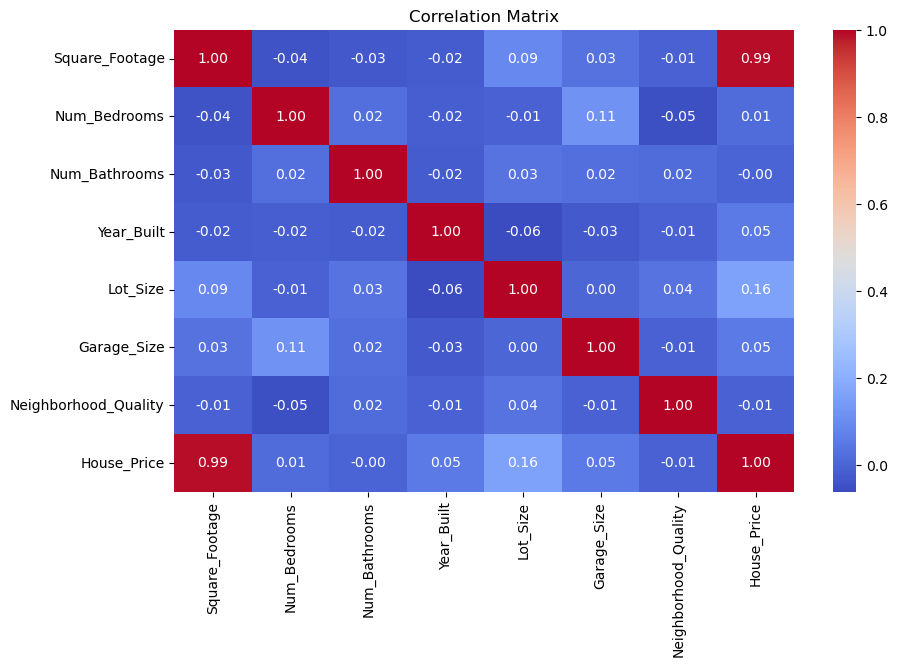

In [5]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Set up visualizations (optional)
def plot_distribution(data, feature):
    """
    Plot the distribution of a specific feature in the dataset.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

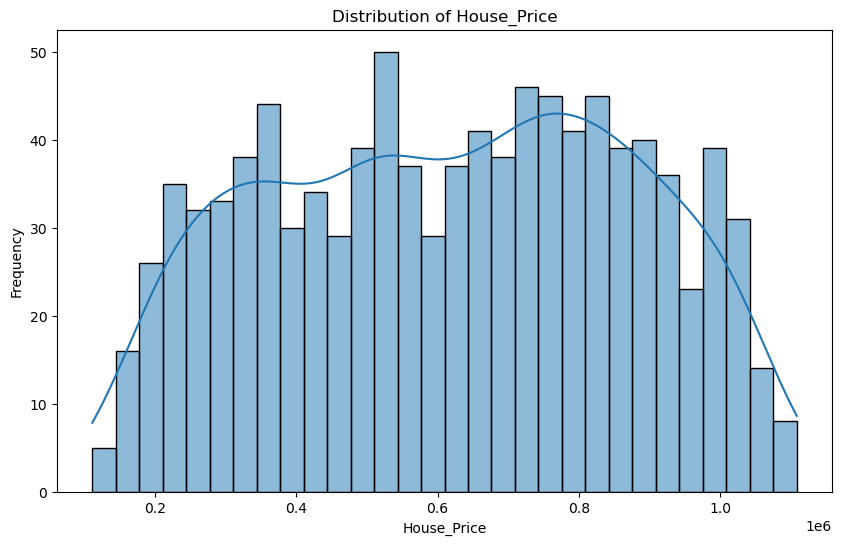

In [7]:
plot_distribution(data, 'House_Price')  

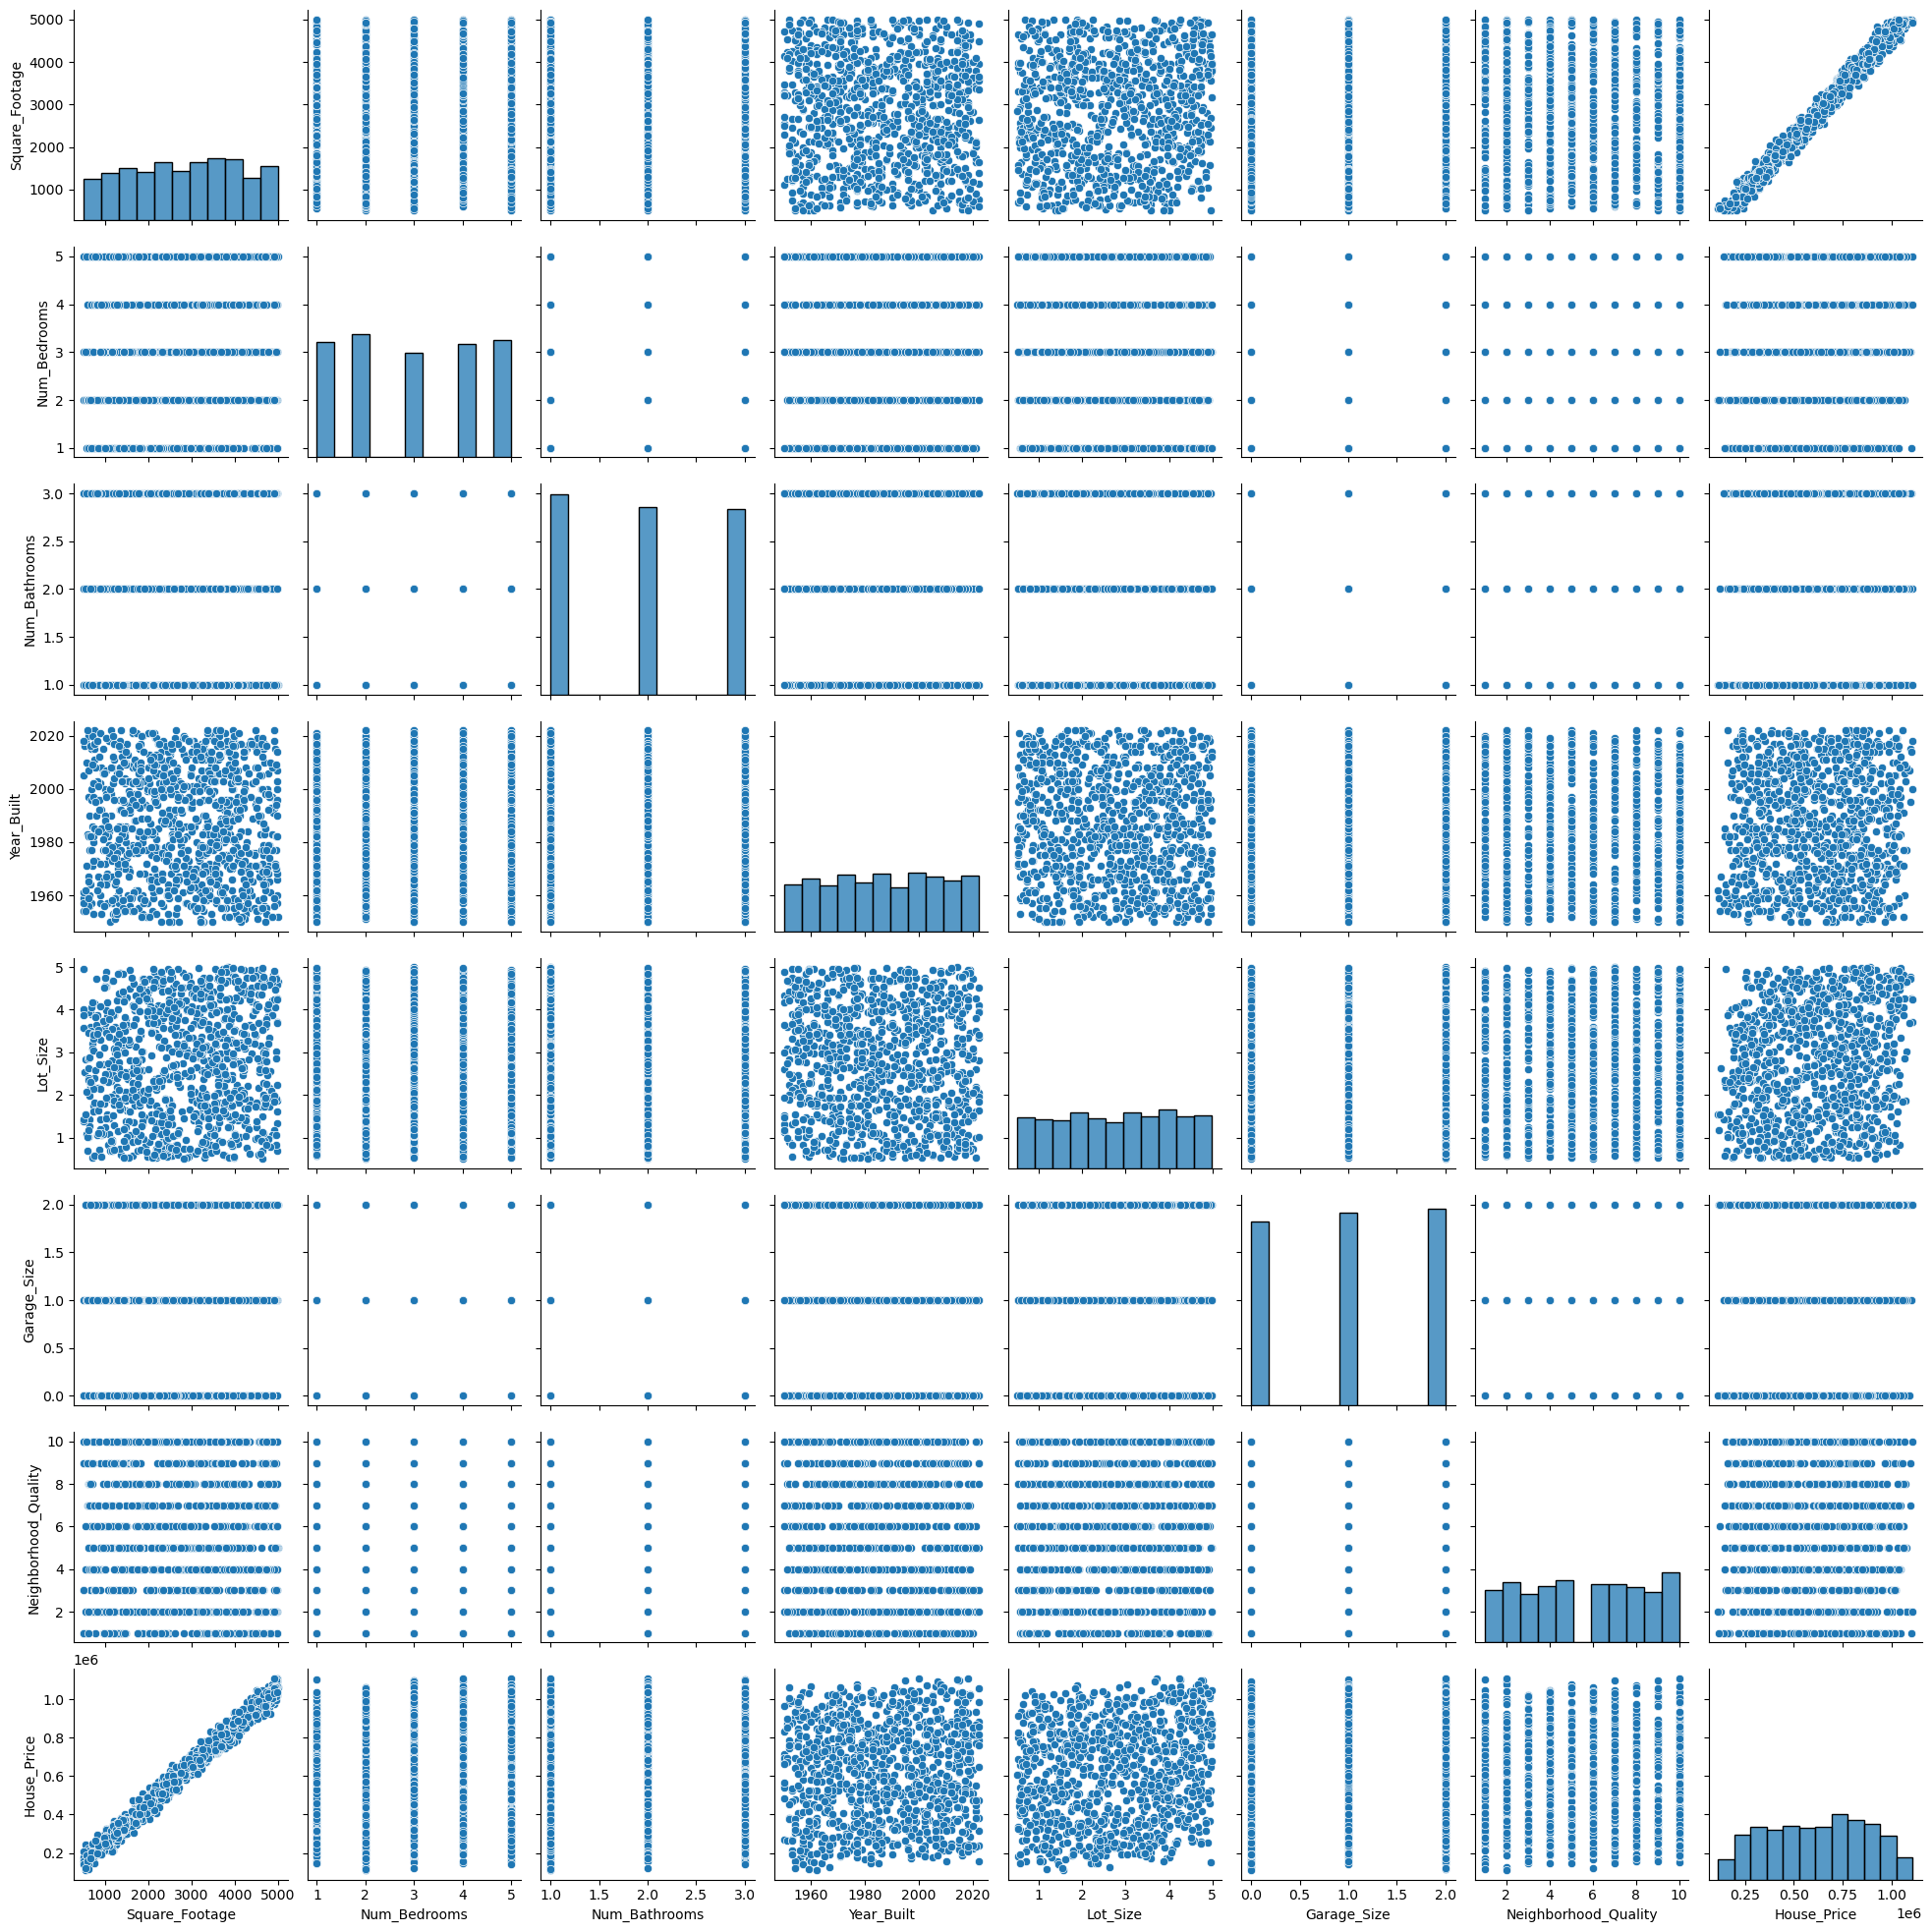

In [8]:
# Pairplot to explore pairwise relationships
sns.pairplot(data)
plt.show()

In [9]:
features_to_encode = get_possible_categorical_features(data, max_categories=10)

In [10]:
print_value_counts_for_categorical_features(data, max_categories=10)


Value counts for feature: 'Num_Bedrooms'
              count
Num_Bedrooms       
2               215
5               205
1               201
4               197
3               182

Value counts for feature: 'Num_Bathrooms'
               count
Num_Bathrooms       
1                350
2                327
3                323

Value counts for feature: 'Garage_Size'
             count
Garage_Size       
2              343
1              336
0              321

Value counts for feature: 'Neighborhood_Quality'
                      count
Neighborhood_Quality       
10                      123
5                       109
2                       105
7                       102
6                       101
4                        99
8                        97
1                        91
9                        88
3                        85


In [11]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns= features_to_encode.keys(), drop_first=True)
print("Shape after one-hot encoding:", data_encoded.shape)

Shape after one-hot encoding: (1000, 21)


In [12]:
data_encoded.head()

,Square_Footage,Year_Built,Lot_Size,House_Price,Num_Bedrooms_2,Num_Bedrooms_3,Num_Bedrooms_4,Num_Bedrooms_5,Num_Bathrooms_2,Num_Bathrooms_3,...,Garage_Size_2,Neighborhood_Quality_2,Neighborhood_Quality_3,Neighborhood_Quality_4,Neighborhood_Quality_5,Neighborhood_Quality_6,Neighborhood_Quality_7,Neighborhood_Quality_8,Neighborhood_Quality_9,Neighborhood_Quality_10
0,1360,1981,0.599637,2.623829e+05,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,4272,2016,4.753014,9.852609e+05,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,3592,2016,3.634823,7.779774e+05,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,966,1977,2.730667,2.296989e+05,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,4926,1993,4.699073,1.041741e+06,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
def find_binary_columns(data):
    """
    Identify columns in a pandas DataFrame that are binary (have exactly two unique values).

    Parameters:
    - data (pd.DataFrame): The input DataFrame.

    Returns:
    - List of column names that have exactly two unique values.
    """
    binary_columns = [col for col in data.columns if data[col].nunique() == 2 and pd.api.types.is_numeric_dtype(data[col])]
    return binary_columns

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Find binary columns
binary_columns = find_binary_columns(data)


# Scale the numerical features
numerical_columns = data_encoded.select_dtypes(include=np.number).columns

# Exclude binary/encoded columns from scaling
columns_to_scale = [col for col in numerical_columns if col not in binary_columns]

# Initialize the scaler
scaler = StandardScaler()

# Scale only the selected numerical columns
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

print("Data after scaling (numerical columns scaled, binary columns untouched):")
print(data_encoded.head())

Data after scaling (numerical columns scaled, binary columns untouched):
   Square_Footage  Year_Built  Lot_Size  House_Price  Num_Bedrooms_2  \
0       -1.159803   -0.269122 -1.679278    -1.406552            True   
1        1.160724    1.428045  1.522390     1.445699           False   
2        0.618843    1.428045  0.660422     0.627824           False   
3       -1.473776   -0.463084 -0.036555    -1.535512           False   
4        1.681887    0.312764  1.480809     1.668552            True   

   Num_Bedrooms_3  Num_Bedrooms_4  Num_Bedrooms_5  Num_Bathrooms_2  \
0           False           False           False            False   
1            True           False           False            False   
2           False           False           False             True   
3           False           False           False             True   
4           False           False           False            False   

   Num_Bathrooms_3  ...  Garage_Size_2  Neighborhood_Quality_2  \
0      

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['House_Price'])  # Assuming 'Price' is the target variable
y = data_encoded['House_Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (800, 20)
Testing set size: (200, 20)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.001621035707084017
R-squared (R²): 0.998384657725215


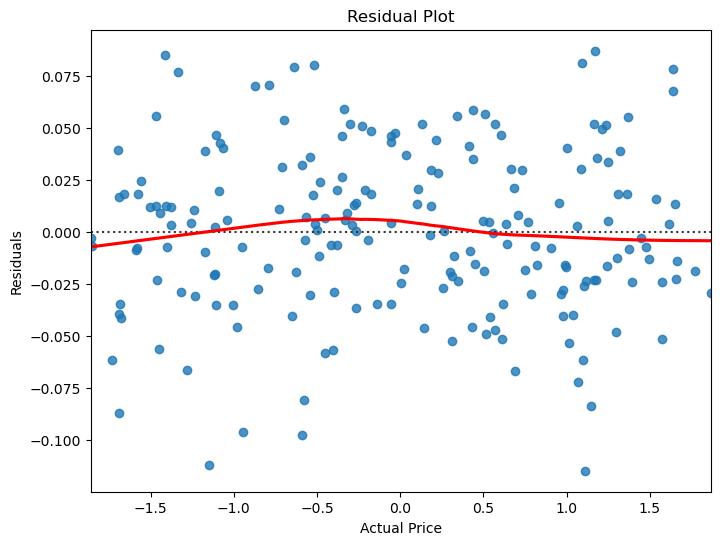

In [17]:
# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

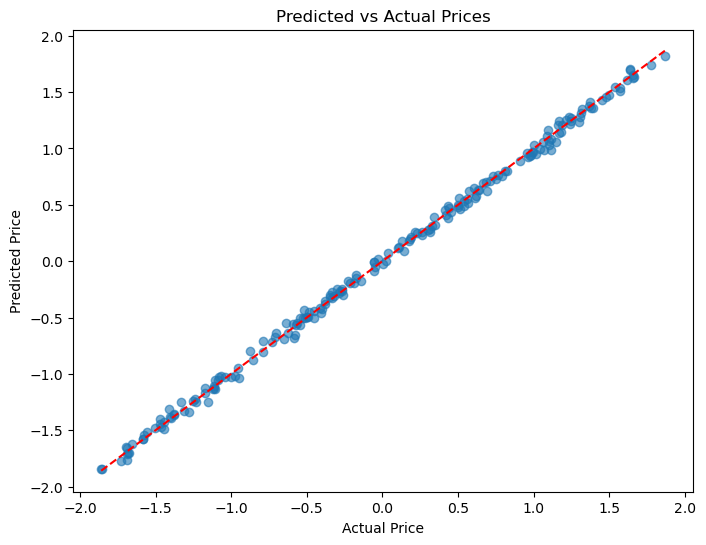

In [18]:
# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices")
plt.show()

---

## Feature Selection 

Feature selection is an essential step in building an efficient and interpretable model. By selecting the most relevant features, you can reduce model complexity, improve accuracy, and prevent overfitting.

Here are a few common techniques to find the best features before training the Linear Regression model:

1. Correlation Analysis
For numerical data, features highly correlated with the target variable (y) are usually strong predictors. You can calculate the correlation between each feature and the target and select the most correlated ones.
2. Recursive Feature Elimination (RFE)
This method recursively removes the least important features, training the model multiple times, to determine the most significant features.
3. Lasso Regularization (L1 Regularization)
Lasso regression can automatically perform feature selection by shrinking less important feature coefficients to zero. This method is particularly useful for identifying irrelevant features.
4. Feature Importance from Tree-based Models
Tree-based models, such as Random Forest or Gradient Boosting, provide feature importance scores, which can help in selecting the best features.

Let's go through these methods step by step:
### Method 1: Correlation Analysis
You can check how each feature correlates with the target variable (Price, in your case) using Pearson correlation.

In [19]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Correlation with the target variable (e.g., 'Price')
correlation_with_target = correlation_matrix['House_Price'].sort_values(ascending=False)

# Display the top correlated features with 'Price'
print("Top features correlated with Price:\n", correlation_with_target)

Top features correlated with Price:
 House_Price             1.000000
Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Num_Bathrooms          -0.001862
Neighborhood_Quality   -0.007770
Name: House_Price, dtype: float64


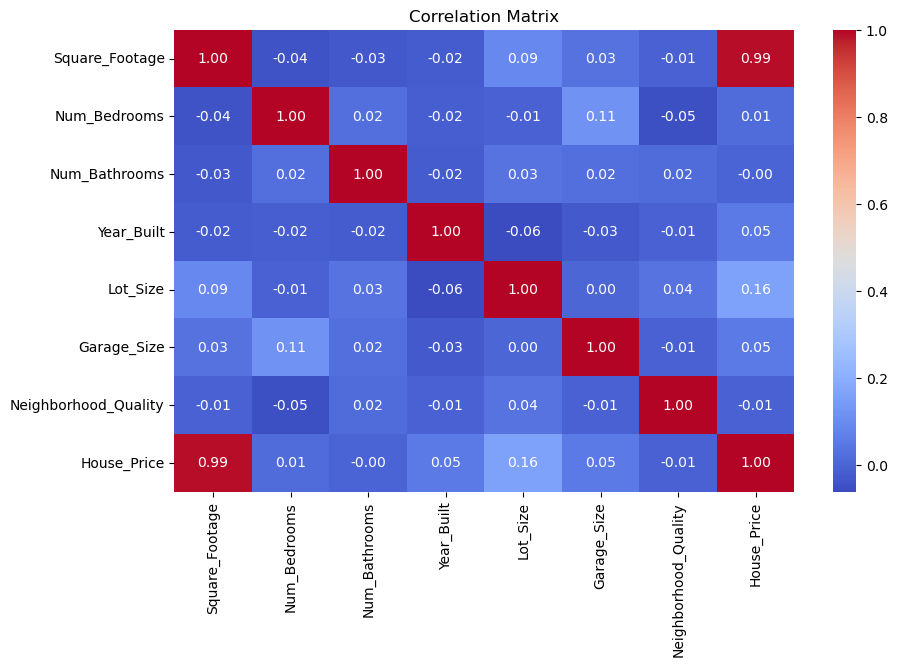

In [20]:
# Optional: Plot a heatmap of the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Method 2: Recursive Feature Elimination (RFE)
RFE is a wrapper method that works by recursively removing the least important features based on a model (like Linear Regression) and ranks them.

In [21]:
from sklearn.feature_selection import RFE

# Initialize Linear Regression model
model = LinearRegression()

# Use Recursive Feature Elimination (RFE) to select the top features
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['Square_Footage', 'Year_Built', 'Lot_Size', 'Num_Bedrooms_4',
       'Num_Bedrooms_5'],
      dtype='object')


In [22]:
# Optional: Train the model with the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train the model
model.fit(X_train_rfe, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_rfe)
mse_rfe = mean_squared_error(y_test, y_pred)
r2_rfe = r2_score(y_test, y_pred)

print(f"RFE Model MSE: {mse_rfe}")
print(f"RFE Model R-squared: {r2_rfe}")

RFE Model MSE: 0.003091495825724143
RFE Model R-squared: 0.9969193621844415


### Method 3: Lasso Regularization (Feature Selection)
Lasso regression automatically reduces the coefficients of irrelevant features to zero. By looking at the features with non-zero coefficients, you can identify the most important ones.

In [23]:
from sklearn.linear_model import Lasso

# Initialize Lasso model
lasso = Lasso(alpha=0.1)  # Adjust alpha to control regularization strength

# Fit the model
lasso.fit(X_train, y_train)

# Get the coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=X_train.columns)

# Display the features with non-zero coefficients (these are the selected features)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index
print("Selected Features by Lasso:", selected_features_lasso)

# Optional: Train a model using only these features
X_train_lasso = X_train[selected_features_lasso]
X_test_lasso = X_test[selected_features_lasso]

# Train the model
model.fit(X_train_lasso, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_lasso)
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

print(f"Lasso Model MSE: {mse_lasso}")
print(f"Lasso Model R-squared: {r2_lasso}")

Selected Features by Lasso: Index(['Square_Footage'], dtype='object')
Lasso Model MSE: 0.016837055409323638
Lasso Model R-squared: 0.9832220800154357


### Method 4: Feature Importance from Tree-based Models
Tree-based models like Random Forest can help identify important features based on how much they contribute to reducing prediction error.

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort the features by importance
sorted_importances = feature_importances.sort_values(ascending=False)

# Display the top features
print("Top Features by Random Forest Importance:\n", sorted_importances)

# Optional: Select the top features for training
top_features = sorted_importances.index[:5]  # Select top 5 features
X_train_rf = X_train[top_features]
X_test_rf = X_test[top_features]

# Train the model with the selected features
model.fit(X_train_rf, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_rf)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest Feature Selection Model MSE: {mse_rf}")
print(f"Random Forest Feature Selection Model R-squared: {r2_rf}")

Top Features by Random Forest Importance:
 Square_Footage             0.986175
Year_Built                 0.005576
Lot_Size                   0.005310
Num_Bedrooms_5             0.000501
Num_Bathrooms_3            0.000283
Garage_Size_2              0.000213
Num_Bedrooms_2             0.000212
Garage_Size_1              0.000181
Num_Bathrooms_2            0.000177
Neighborhood_Quality_6     0.000171
Neighborhood_Quality_5     0.000160
Num_Bedrooms_4             0.000159
Num_Bedrooms_3             0.000158
Neighborhood_Quality_10    0.000131
Neighborhood_Quality_2     0.000116
Neighborhood_Quality_7     0.000112
Neighborhood_Quality_9     0.000100
Neighborhood_Quality_8     0.000094
Neighborhood_Quality_4     0.000091
Neighborhood_Quality_3     0.000080
dtype: float64
Random Forest Feature Selection Model MSE: 0.003710679652442048
Random Forest Feature Selection Model R-squared: 0.996302353066882


### Summary:
Correlation Analysis: Identifies features that are highly correlated with the target.
Recursive Feature Elimination (RFE): Uses a model (e.g., Linear Regression) to recursively eliminate irrelevant features.
Lasso Regression: Uses L1 regularization to automatically select important features by shrinking the coefficients of irrelevant features to zero.
Random Forest Feature Importance: Uses tree-based models to rank features by importance.